# Python Code To Create Chatbots about HR Policy

## 1) Visualization of the Department of Health and Human Services (HHS) Human Resources Policy Library

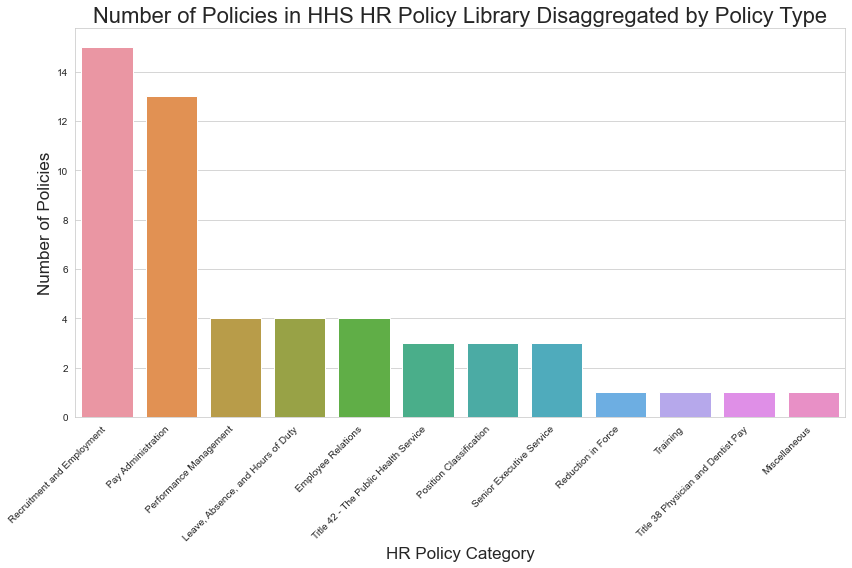

In [15]:
# Import pandas library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
# initialize list of lists
data = [['Recruitment and Employment', 15],
        ['Pay Administration', 13],
        ['Performance Management', 4],
        ['Leave, Absence, and Hours of Duty', 4],
        ['Employee Relations', 4],
        ['Title 42 - The Public Health Service', 3], 
        ['Position Classification', 3], 
        ['Senior Executive Service', 3],
        ['Reduction in Force', 1],
        ['Training', 1],
        ['Title 38 Physician and Dentist Pay', 1],
        ['Miscellaneous', 1]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['HR_Policy_Category', 'Number_of_Policies'])



plt.figure(figsize = (12, 8))
sns.set_style("whitegrid")
chart = sns.barplot(x = df.HR_Policy_Category, y=df.Number_of_Policies)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')
plt.title('Number of Policies in HHS HR Policy Library Disaggregated by Policy Type', fontsize = 22)
chart.set_xlabel("HR Policy Category", fontsize=17)
chart.set_ylabel("Number of Policies", fontsize=17)
#chart.set(xlabel='HR Policy Category', ylabel='Number of Policies', fontsize = 10)
plt.tight_layout()

## 2) Chatbot 1 - Sentence-Based Transformer Chatbot That Leverages Cosine Similarity

In [ ]:
!pip install pydantic==1.10.2

In [1]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from dataclasses import dataclass
from timeit import default_timer as timer
import random
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize 

import gensim
from gensim.models import Word2Vec

#import spacy
#from spacy import displacy

#from spacy.matcher import Matcher 
#from spacy.tokens import Span 

import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer, util
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


from IPython.display import display, HTML

from typing import List, Callable, Dict, Tuple, Set

pd.set_option('max_colwidth', 600)
pd.set_option('display.max_rows', 500)


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
#Load Sentence Transformer model optimized for  sentence cosine similarity calculations

model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

In [2]:
# Only run this once, they will be downloaded.
nltk.download('stopwords',quiet=True)
nltk.download('wordnet',quiet=True)
nltk.download('punkt',quiet=True)
nltk.download('omw-1.4',quiet=True)

True

In [3]:
#read in data
CORPUS_PATH = 'C:/Users/steve/OneDrive/Desktop/Github/HR_Policy_Chatbot_Capstone_Project/corpus.txt'
f=open(CORPUS_PATH,'r',errors = 'ignore')
raw=f.read()
raw=raw.lower()# converts to lowercase

#create list of sentences and words
sent_tokens = nltk.sent_tokenize(raw)# converts to list of sentences 
word_tokens = nltk.word_tokenize(raw)# converts to list of words

In [20]:
#create greetings and greetings function

GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["Hello"]


# Checking for greetings
def greeting(sentence):
    """If user's input is a greeting, return a greeting response"""
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [21]:

# Generating response function 
def response(user_response):
    chatbot_response=''
    sentence_encodings=model.encode(sent_tokens, convert_to_tensor=True)# generate sentence transformer embeddings
    sentence_encodings=sentence_encodings.cpu()
    vals = cosine_similarity(sentence_encodings[-1].reshape(1, -1), sentence_encodings) #the chatbot conversation code 
    #in the next cell adds the question as the last sentence of the sentence tokens, before calling this response function.
    #The code takes the last sentence (which is the question) and gets cosine similarities vs all the sentences in the corpus,
    #including itself
    idx=vals.argsort()[0][-2] #gets the index of the second highest similarity (the first highest would be the question itself)
    flat = vals.flatten()#reduces dimension of cosine similarity array to be able to sort
    flat.sort() #sort the cosine similarity values
    second_cos_sim_val = flat[-2] #get the second highest cosine similarity value.
    if(second_cos_sim_val==0): #check the second highest cosine similarity value. If it's zero return the no match response,
        #else return highest cosine similarity sentence.
        chatbot_response=chatbot_response+"Sorry, I do not have an answer to your question in my database"
        return chatbot_response
    else:
        chatbot_response = chatbot_response+sent_tokens[idx] #use index of highest cosine similarity to get original sentence
        return chatbot_response

In [22]:
#Chatbot interaction code

flag=True
print("Welcome to the Informational Chatbot About Human Resources policy at the Department of Health and Human Services.  To end this session, please type exit.")
print("\n")

while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if user_response!='exit':
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("Answer: You are welcome!")
        else:
            if(greeting(user_response)!=None):
                print("Answer: "+greeting(user_response))
            else:
                sent_tokens.append(user_response)
                word_tokens=word_tokens+nltk.word_tokenize(user_response)
                final_words=list(set(word_tokens))
                print("Answer: ",end="")
                print(response(user_response))
                print("\n")
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("Thank you for using this chatbot service. Goodbye.")    


Welcome to the Informational Chatbot About Human Resources policy at the Department of Health and Human Services.  To end this session, please type exit.


Name one or more means of handling misconduct
Answer: examples of misconduct include tardiness, absenteeism, unprofessional or discourteous conduct, damaging or destroying government property, or falsification.


Up to how much money can an individual receive per year from the Student Loan Repayment Program?
Answer: eligible employees may be considered for loan repayment assistance up to $10,000 per calendar year, with a $60,000 lifetime maximum for any individual.


What is considered the government's last resort for reducing the number of agency staff?
Answer: agency.


Where are employee records, such as annual ratings under a performance appraisal program, held?
Answer: the regulations specify that appraisal periods shall generally be designated so that employees are provided a rating of record annually.


When can students volu

In [2]:

chatbot_models = []

for i in range(10):
    chatbot_models.append(1)
    
model_1_performance_list = ["Incorrect",
                           "Correct",
                           "Incorrect",
                           "Incorrect",
                           "Incorrect",
                           "Correct",
                           "Correct",
                           "Correct",
                           "Incorrect",
                           "Correct"]

## 3) Chatbot 2 - Fine-Tune GPT2 Model

In [ ]:
!pip install transformers

In [ ]:
pip install --upgrade protobuf

In [ ]:




############################## UPDATE THIS TO USE FINE TUNING QUESTIONS SPECIFIC TO THE CORPUS ###############################










import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer, AdamW

# Load the GPT-2 model and tokenizer
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
# Define multiple question and answer pairs
qa_pairs = [
    ("Which species are at the top of the food chain in coral reefs?", "sharks and giant moray. STOP"),
    ("What fish eat coral?", "parrotfish and butterflyfish. STOP"),
    ("Which coral reef fish has the shortest lifespan?", "seven-figure pygmy goby. STOP"),
    ("What species in coral reefs can inflate themselves?", "puffers, striated frogfish, and porcupinefish. STOP"),
    ("How do sea anemones protect themselves?", "tentacles that bristle tiny harpoons primed with toxins. STOP"),
    ("What species commonly serves as a cleaner fish?", "bluestreak cleaner wrasse. STOP"),
    ("What species in coral reefs eat sponges?", "emperor angelfish. STOP"),
    ("What species in coral reefs eat stingrays?", "caribbean reef shark and great hammerheads. STOP"),
    ("Which species in coral reefs are hermaphrodites", "grouper. STOP"),
    ("What species in coral reefs is known to eat birds?", "blacktip reef shark. STOP"),
    ("What percent of the ocean is covered by coral reefs?", "less than 1%. STOP"),
    ("When is the colouration of clown triggerfish vivid?", "when they are not threatened. STOP"),
    ("What are reef lizardfish coated in?", "mucus. STOP"),
    ("Name some coral reef fish that feed on zooplankton?", "damselfish, surgeonfish, and cardinalfish. STOP"),
    ("Parrotfish often school with what other species?", "spinefoot rabbitfish. STOP"),
    ("What species eat sea anemones?", "saddle butterflyfish. STOP"),
    ("How many venomous spines does the reef stonefish have?", "13. STOP"),
    ("What predators eat reef stonefish?", "bottom feeding rays, sharks, and Stokes' seasnake. STOP"),
    ("What toxin is sometimes found coral reef carnivores?", "ciguatera toxin. STOP"),
    ("How long are whitetip reef sharks?", "usually less than 1.6 meters. STOP"),
    ("How long are whitetip reef sharks?", "less than 1.6 meters. STOP"),
    ("What predators eat whitetip reef sharks?", "tiger sharks and Galapagos sharks. STOP"),
    ("What predators eat blacktip reef sharks?", "groupers, grey reef sharks, tiger sharks, and members of their own species. STOP"),
    ("What sharks are known for having small home ranges?", "blacktip reef sharks. STOP"),
    ("Are grey reef sharks social or territorial?", "social. STOP"),
    ("Name a coral reef shark that likes drop-offs?", "whitetip reef shark, blacktip reef shark, or grey reef shark. STOP"),
    ("What do benthic algae grow on?", "dead coral and other inert surfaces. STOP"),
    ("What do goatfish use to search for food?", "chemosensory barbels (whiskers). STOP"),   
    ("Goatfish commonly change their colouration to match that of which fish?", "snapper. STOP"),   
    ("What does the tassled scorpionfish camouflage itself to look like?", "coral encrusted sea floor. STOP"),  
    ("What are some threats to the survival of coral reef fish?", "pollution, overfishing, and habitat loss and degradation. STOP"),  
    ("What percent of marine fish species live in coral reefs?", "25 percent. STOP"), 
    ("Where do most coral reef fish have spines?", "on their fins. STOP"),  
    ("Why do toadfish sing?", "to attract mates. STOP"), 
    ("What do Synchiropus splendidus eat?", "small crustaceans and other invertebrates. STOP"), 
    ("What color is the mouth of the clown triggerfish?", "bright yellow. STOP"),   
    ("How many species of parasites would go extinct if one coral reef fish species of average size went extinct?", "at least 10. STOP"),      
    ("What types of sharks can enter brackish or freshwater environments?", "blacktip reef sharks. STOP"),
    ("What sound frequency do whitetip reef sharks recognize as coming from struggling fish?", "25 - 100 Hz. STOP"),
    ("Can whitetip reef sharks rest on the sea floor or do they have to keep moving?", "They can rest on the sea floor. STOP"),    
    ("Are whitetip reef sharks better at hunting in tight crevices or in open water?", "tight crevices. STOP"),
    ("How long are Caribbean reef sharks?", "up to 3 meters. STOP"), 
    ("Titan triggerfish use jets of water to expose what species buried in the sand?", "sand dollars. STOP"), 
    ("Are coral reef fish bodies often optimized for straight-line speed or for manoeuvrability?", "manoeuvrability. STOP"),
    ("Where does the foureye butterflyfish get its name from?", "the large dark spots each side of their bodies. STOP"), 
    ("How long are striated frogfish?", "about 10 centimeters. STOP"),
    ("Why do some coral reef fish engage in schooling?", "defense against predators through better predator detection. STOP"),
    ("What are lateral lines in coral reef fish?", "pressure sensors that allow schooling fish to feel each others' movements and stay synchronized. STOP"),
    ("What is a primary producer?", "a plant that synthesizes food from solar energy. STOP"), 
    ("What is the name for the stinging cells in fire coral?", " nematocysts. STOP")
]

# Concatenate the question and answer pairs with appropriate formatting
formatted_pairs = [f"Q: {q}\nA: {a}\n" for q, a in qa_pairs]
qa_text = "\n".join(formatted_pairs)

# Fine-tune the GPT-2 model with the Q&A pairs
inputs = tokenizer.encode(qa_text, return_tensors="pt", max_length = 1000)
model.train()

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Run the fine-tuning loop (example: 1 epoch)
for j in range(120):
    print (j)
    outputs = model(inputs, labels=inputs)
    loss = outputs.loss
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

# Save the fine-tuned model
model.save_pretrained("fine-tuned-gpt2")

# Load the fine-tuned model
fine_tuned_model = GPT2LMHeadModel.from_pretrained("fine-tuned-gpt2")



In [ ]:






########################### UPDATE THIS SECTTION WEHN ASSESSING MODEL PERFORMANCE ########################################







# Test the fine-tuned model with a question
test_question = "Q: How many species of fish live in coral reefs?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])


In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: What is the most venomous fish?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])


In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: What sharks live in coral reefs?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: What fish are poisonous?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: What fish can electrocute you?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: What species can sting you?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: What species are parasitic?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: What species are venomous?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: What species are known for attacking scuba divers?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: What are common herbivorous fish?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: Why do fish camouflage themselves?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: How do fish get rid of their parasites?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: What species have a mutualistic relationship?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: What species have a commensalistic relationship?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: Where in the world are coral reefs found?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: What species engage in schooling?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: What species are ambush predators?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: Which species are ambush predators?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: Why are some coral reef fish colorful?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: Which species is blue?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [ ]:
# Test the fine-tuned model with a question
test_question = "Q: What is the slowest species that lives in coral reefs?"

# Generate a completion for the test question
input_ids = tokenizer.encode(test_question, return_tensors="pt")
output = fine_tuned_model.generate(input_ids, max_length=100)
completion = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated completion for the test question:")
print(completion.split("STOP")[0].splitlines()[0:2])

In [3]:
for i in range(10):
    chatbot_models.append(2)
    
    
model_2_performance_list = [""]

## 4) Chatbot 3 - Chatbot Emphasizing Cosine Similarity of TF-IDF Representations of Sententces

In [25]:
import io
import random
import string # to process standard python strings
import warnings
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [26]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('popular', quiet=True) # for downloading packages
#nltk.download('punkt') # first-time use only
#nltk.download('wordnet') # first-time use only

True

In [27]:
CORPUS_PATH = 'C:/Users/steve/OneDrive/Desktop/Github/HR_Policy_Chatbot_Capstone_Project/corpus.txt'
f=open(CORPUS_PATH,'r',errors = 'ignore')
raw=f.read()
raw = raw.lower()# converts to lowercase

In [28]:
sent_tokens = nltk.sent_tokenize(raw)# converts to list of sentences 
word_tokens = nltk.word_tokenize(raw)# converts to list of words

In [29]:
lemmer = nltk.stem.WordNetLemmatizer()
#WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [30]:
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["Hi", "Hey", "*nods*", "Hi there", "Hello", "I am glad! You are talking to me"]
def greeting(sentence):
 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [31]:
def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you"
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

In [32]:
flag=True
print("Hello, I am the Unofficial Department of Health and Human Services (HHS) Human Resources (HR) Policy Chatbot! I will answer your queries related to HR policy at HHS. If you want to exit, type bye.")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("You are welcome.")
        else:
            if(greeting(user_response)!=None):
                print(greeting(user_response))
            else:
                print("",end="")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("Bye! take care..")

Hello, I am the Unofficial Department of Health and Human Services (HHS) Human Resources (HR) Policy Chatbot! I will answer your queries related to HR policy at HHS. If you want to exit, type bye.
Name one or more means of handling misconduct
b. means of handling misconduct

counseling or verbal warnings should be used by the supervisor when:
infractions are minor and infrequent; and
the supervisor determines that counseling and/or verbal warnings will likely preclude a recurrence of the misconduct.
Up to how much money can an individual receive per year from the Student Loan Repayment Program?
c.	student loan repayment program (slrp).
What is considered the government's last resort for reducing the number of agency staff?
cost- effectiveness measures should address specific resource levels or constraints (money, personnel, or time) that can be documented and measured such as maintaining or reducing unit costs, reducing the time it takes to produce or provide a product or service, or r

In [4]:

for i in range(10):
    chatbot_models.append(3)

model_3_performance_list = ["Correct",
                           "Incorrect",
                           "Incorrect",
                           "Incorrect",
                           "Incorrect",
                           "Correct",
                           "Correct",
                           "Partially Correct",
                           "Correct",
                           "Incorrect"]


## 5) Chatbot 4 - Distilbert Chatbot

Source: https://huggingface.co/distilbert-base-cased-distilled-squad

In [4]:
#read in data
CORPUS_PATH = 'C:/Users/steve/OneDrive/Desktop/Github/HR_Policy_Chatbot_Capstone_Project/corpus.txt'
f=open(CORPUS_PATH,'r',errors = 'ignore')
raw=f.read()
raw=raw.lower()# converts to lowercase

In [5]:
from transformers import pipeline
question_answerer = pipeline("question-answering", model='distilbert-base-cased-distilled-squad')

#context = r"""
#Extractive Question Answering is the task of extracting an answer from a text given a question. An example     of a
#question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
#a model on a SQuAD task, you may leverage the examples/pytorch/question-answering/run_squad.py script.
#"""

result = question_answerer(question="Name one or more means of handling misconduct",     context=raw)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

#Answer: 'SQuAD dataset', score: 0.5152, start: 147, end: 160

Answer: 'counseling or verbal warnings', score: 0.4723, start: 339312, end: 339341


In [6]:
result = question_answerer(question="Up to how much money can an individual receive per year from the Student Loan Repayment Program?", context=raw)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

Answer: '$10,000', score: 0.7718, start: 1363913, end: 1363920


In [8]:
import datetime
runtimes_list_distilbert = []

In [ ]:
start_time = datetime.datetime.now()

result = question_answerer(question="What is considered the government's last resort for reducing the number of agency staff?",     context=raw)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

end_time = datetime.datetime.now()
runtime = end_time - start_time
runtimes_list_distilbert.append(runtime)

In [10]:
start_time = datetime.datetime.now()

result = question_answerer(question="Where are employee records, such as annual ratings under a performance appraisal program, held?",     context=raw)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

end_time = datetime.datetime.now()
runtime = end_time - start_time
runtimes_list_distilbert.append(runtime)

Answer: 'usajobs', score: 0.8649, start: 1112439, end: 1112446


In [ ]:
start_time = datetime.datetime.now()

result = question_answerer(question="When can students volunteer at HHS through the Student Volunteer Service?",     context=raw)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

end_time = datetime.datetime.now()
runtime = end_time - start_time
runtimes_list_distilbert.append(runtime)

In [11]:
start_time = datetime.datetime.now()

result = question_answerer(question="Up to how many years can an employee serve overseas in a single country on a tour of duty?",     context=raw)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

end_time = datetime.datetime.now()
runtime = end_time - start_time
runtimes_list_distilbert.append(runtime)

Answer: '24 or 36 months', score: 0.8956, start: 859936, end: 859951


In [ ]:
start_time = datetime.datetime.now()

result = question_answerer(question="To be eligible for an appointment under Schedule A authority, an applicant must have a disability as defined in what law?", context=raw)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

end_time = datetime.datetime.now()
runtime = end_time - start_time
runtimes_list_distilbert.append(runtime)

In [9]:
start_time = datetime.datetime.now()

result = question_answerer(question="Which types of doctors are eligible for PDP Pay?", context=raw)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

end_time = datetime.datetime.now()
runtime = end_time - start_time
runtimes_list_distilbert.append(runtime)

Answer: 'ohr, ohro, and opdiv', score: 0.9212, start: 1506982, end: 1507002


In [ ]:
start_time = datetime.datetime.now()

result = question_answerer(question="What is the name for a payment made to a newly appointed employee filling a critical position that would be difficult to fill?", context=raw)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

end_time = datetime.datetime.now()
runtime = end_time - start_time
runtimes_list_distilbert.append(runtime)

In [ ]:
start_time = datetime.datetime.now()

result = question_answerer(question="Name one or more required training topics for supervisors", context=raw)
print(f"Answer: '{result['answer']}', score: {round(result['score'], 4)}, start: {result['start']}, end: {result['end']}")

end_time = datetime.datetime.now()
runtime = end_time - start_time
runtimes_list_distilbert.append(runtime)

In [13]:


for i in range(5):
    chatbot_models.append(4)

model_4_performance_list = ["Correct",
                           "Correct",
                           "Incorrect",
                           "Incorrect",
                           "Incorrect"]

NameError: name 'chatbot_models' is not defined

In [12]:
print(runtimes_list_distilbert)

[datetime.timedelta(seconds=966, microseconds=868074), datetime.timedelta(seconds=1108, microseconds=320687), datetime.timedelta(seconds=929, microseconds=327006)]


In [15]:
seconds_list_distilbert = []

for i in runtimes_list_distilbert:
    seconds_list_distilbert.append(i.seconds)
    
print(seconds_list_distilbert)

[966, 1108, 929]


In [16]:
seconds_series_distilbert = pd.Series(seconds_list_distilbert) 

seconds_series_distilbert.describe()

count       3.000000
mean     1001.000000
std        94.493386
min       929.000000
25%       947.500000
50%       966.000000
75%      1037.000000
max      1108.000000
dtype: float64

## 6) Chatbot 5 - Roberta Chatbot

https://huggingface.co/deepset/roberta-base-squad2

In [17]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer, pipeline, RobertaTokenizer, RobertaModel, TFRobertaModel
from transformers import optimization

batch_size = 96
n_epochs = 2
base_LM_model = "roberta-base"
max_seq_len = 386
learning_rate = 3e-5
#lr_schedule = optimization.LinearWarmup
warmup_proportion = 0.2
doc_stride=128
max_query_length=64

runtimes_list_roberta = []

In [ ]:
#!pip install farm-haystack[inference]

In [19]:

#from haystack.reader.farm import FARMReader

#reader = TransformersReader(model_name_or_path="deepset/roberta-base-squad2",tokenizer="deepset/roberta-base-squad2")

model_name = "deepset/roberta-base-squad2"

# a) Get predictions
nlp = pipeline('question-answering', model=model_name, tokenizer=model_name)

start_time = datetime.datetime.now()

QA_input = {
    'question': 'Name one or more means of handling misconduct',
    'context': raw
}
res = nlp(QA_input)

# b) Load model & tokenizer
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

res

end_time = datetime.datetime.now()
runtime = end_time - start_time
runtimes_list_roberta.append(runtime)

In [20]:
print(res)

{'score': 0.663546621799469, 'start': 379579, 'end': 379603, 'answer': 'singly or in combination'}


In [21]:
print(runtimes_list_roberta)

[datetime.timedelta(seconds=2113, microseconds=894439)]


In [22]:
# a) Get predictions

start_time = datetime.datetime.now()

QA_input = {
    'question': 'Up to how much money can an individual receive per year from the Student Loan Repayment Porgram?',
    'context': raw
}
res = nlp(QA_input)

res

end_time = datetime.datetime.now()
runtime = end_time - start_time
runtimes_list_roberta.append(runtime)

In [23]:
print(res)

{'score': 0.5155758261680603, 'start': 62774, 'end': 62782, 'answer': '$275,000'}


In [ ]:
# a) Get predictions
'
start_time = datetime.datetime.now()

QA_input = {
    'question': 'What is considered the governments last resort for reducing the number of agency staff?',
    'context': raw
}
res = nlp(QA_input)

res

end_time = datetime.datetime.now()
runtime = end_time - start_time
runtimes_list_roberta.append(runtime)

In [24]:
# a) Get predictions

start_time = datetime.datetime.now()

QA_input = {
    'question': 'Where are employee records, such as annual ratings under a performance appraisal program held?',
    'context': raw
}
res = nlp(QA_input)

res

end_time = datetime.datetime.now()
runtime = end_time - start_time
runtimes_list_roberta.append(runtime)



In [25]:
print(res)

{'score': 0.3875713646411896, 'start': 706889, 'end': 706912, 'answer': 'on the performance plan'}


In [ ]:
# a) Get predictions

start_time = datetime.datetime.now()

QA_input = {
    'question': 'When can students volunteer at HHS through the Student Volunteer Service?',
    'context': raw
}
res = nlp(QA_input)

res

end_time = datetime.datetime.now()
runtime = end_time - start_time
runtimes_list_roberta.append(runtime)

In [26]:
# a) Get predictions

start_time = datetime.datetime.now()

QA_input = {
    'question': 'Up to how many years can an employee serve overseas in a single country on a tour of duty?',
    'context': raw
}
res = nlp(QA_input)

res

end_time = datetime.datetime.now()
runtime = end_time - start_time
runtimes_list_roberta.append(runtime)

In [27]:
print(res)

{'score': 0.26276782155036926, 'start': 860335, 'end': 860360, 'answer': 'six (6) consecutive years'}


In [ ]:
# a) Get predictions

start_time = datetime.datetime.now()

QA_input = {
    'question': 'To be eligible for an appointment under Schedule A authority,  an applicant must have a disability as defined in what law?',
    'context': raw
}
res = nlp(QA_input)

res

end_time = datetime.datetime.now()
runtime = end_time - start_time
runtimes_list_roberta.append(runtime)

In [28]:
# a) Get predictions

start_time = datetime.datetime.now()

QA_input = {
    'question': 'Which types of doctors are eligible for PDP Pay?',
    'context': raw
}
res = nlp(QA_input)

res

end_time = datetime.datetime.now()
runtime = end_time - start_time
runtimes_list_roberta.append(runtime)

In [29]:
print(res)

{'score': 0.44037607312202454, 'start': 247633, 'end': 247649, 'answer': 'highly qualified'}


In [ ]:
# a) Get predictions

start_time = datetime.datetime.now()

QA_input = {
    'question': 'What is the name for a payment made to a newly appointed employee filling a critical position that would be difficult to fill?',
    'context': raw
}
res = nlp(QA_input)

res

end_time = datetime.datetime.now()
runtime = end_time - start_time
runtimes_list_roberta.append(runtime)

In [ ]:
# a) Get predictions

start_time = datetime.datetime.now()

QA_input = {
    'question': 'Name one or more required training topics for supervisors',
    'context': raw
}
res = nlp(QA_input)

res

end_time = datetime.datetime.now()
runtime = end_time - start_time
runtimes_list_roberta.append(runtime)

In [33]:
# Compile Model Performance Into List
for i in range(5):
    chatbot_models.append(5)

model_5_performance_list = ["Incorrect",
                           "Incorrect",
                           "Incorrect",
                           "Correct",
                           "Incorrect"]

NameError: name 'chatbot_models' is not defined

In [31]:
seconds_list_roberta = []

for i in runtimes_list_roberta:
    seconds_list_roberta.append(i.seconds)
    
print(seconds_list_roberta)

[2113, 2846, 1869, 2296, 2275]


In [32]:
seconds_series_roberta = pd.Series(seconds_list_roberta) 

seconds_series_roberta.describe()

count       5.000000
mean     2279.800000
std       359.668875
min      1869.000000
25%      2113.000000
50%      2275.000000
75%      2296.000000
max      2846.000000
dtype: float64

## 7) Mamba Chatbot

In [7]:

for i in range(10):
    chatbot_models.append(6)

model_6_performance_list = [""]

## 8) Ensemble Methods Chatbot

In [ ]:
"""
The following lines import the necessary libraries:

1. openai for interacting with OpenAI's GPT-3.5-turbo and text embeddings
2. cosine_similarity for comparing embeddings
3. Path for handling file paths
4. time for managing API rate limits
5. os for accessing environment variables
6. pickle for caching embeddings.
"""
import openai
from openai.embeddings_utils import cosine_similarity
from pathlib import Path
import time
import os
import pickle

# Create empty list for storing model runtimes
runtimes_list_ensemble = []

# The OpenAI model used for generating answers (GPT-3.5-turbo)
COMPLETIONS_MODEL = "gpt-3.5-turbo"
# The OpenAI model used for generating text embeddings (text-embedding-ada-002)
EMBEDDING_MODEL = "text-embedding-ada-002"
# The API key for OpenAI, loaded from an environment variable.
openai.api_key = os.environ["OPENAI_KEY"]
# A Path object pointing to the directory containing the documentation in Markdown format.
DOCUMENTATION_PATH = Path("PATH_TO_DOCUMENTATION")
# A Path object pointing to the directory where the split documentation sections will be saved.
DESTINATION_PATH = Path("PATH_TO_SPLIT_DOCUMENTATION_SECTIONS")
# The path to the pickle file used for caching embeddings.
EMBEDDINGS_PATH = "embeddings.pickle"
# The maximum number of matching documents to consider when generating a response.
MAX_MATCHING_DOCUMENTS = 3

In [ ]:
# Create function to get the text embeddings:

def get_embedding(text, model=EMBEDDING_MODEL):
    text = text.replace("\n", " ")
    return openai.Embedding.create(input=[text], model=model)['data'][0]['embedding']

In [ ]:
# Create function to split the documentation into sections and save them as separate Markdown files

def split_into_sections(documentation_path: Path, destination_path: Path):
    # find all markdown files
    md_files = documentation_path.glob("**/*.md")
    # iterate over each file
    for md_file in md_files:
        # split the file by sections
        content = md_file.read_text(encoding="utf-8").split("\n#")
        for idx, section in enumerate(content):
            if not section:
                continue
            # save each section into a separate file
            with open(
                destination_path / f"{md_file.stem}_{idx}.md", "w",
                encoding="utf-8"
            ) as f:
                f.write(section)

In [ ]:
# Create function to generate the embeddings for the documents:

def generate_embeddings(documentation_path: Path, max_calls_per_minute=59):
    md_files = documentation_path.glob("**/*.md")
    embeddings = {}
    start_time = time.time()
    nb_calls = 0
    for md_file in md_files:
        embedding = get_embedding(md_file.read_text(encoding="utf-8"))
        embeddings[md_file] = embedding
        elapsed_time = time.time() - start_time
        nb_calls += 1
        if nb_calls == max_calls_per_minute:
            sleep_for = 60 - elapsed_time
            print(f"sleeping for {sleep_for:.2f} seconds to respect rate limit")
            time.sleep(sleep_for)
            start_time = time.time()
            nb_calls = 0
    return embeddings

In [ ]:
# Create function to find the most relevant documents based on cosine similarity

def get_matching_documents(question, embeddings, max_results=3):
    question_embedding = get_embedding(question)
    scores = [
    {
        "document_path": document_path,
        "score": cosine_similarity(question_embedding, document_embedding)
    }
    for document_path, document_embedding in embeddings.items()]
    sorted_scores = sorted(scores, key=lambda x: x["score"], reverse=True)
    return sorted_scores[:max_results]

In [ ]:
# Create a function to generate an answer using GPT-3.5-turbo based on the relevant documentation:

def answer_question(question, context, model=COMPLETIONS_MODEL):
    MAX_TOKENS = 4097
    return openai.ChatCompletion.create(
        model=model,
        messages=[
            {
                "role": "system",
                "content": f"You are my documentation assistant. You will answer all questions only based on the following documentation: {context}"[:MAX_TOKENS]
            },
            {
                "role": "user",
                "content": question
            },
        ]
    )

In [ ]:
# Create a function to generate a response by combining the answer and the reference documentation:

def generate_response(question: str, all_embeddings: dict, max_results=MAX_MATCHING_DOCUMENTS): 
    matching_documents = get_matching_documents(question, all_embeddings, max_results=max_results)
    context = " ".join([doc["document_path"].read_text(encoding="utf-8") for doc in matching_documents])
    answer = answer_question(question, context)["choices"][0]["message"]["content"]
    return f"""
    Answer: {answer}
    Reference:
    {context}
    """

In [ ]:
# Create the DESTINATION_PATH directory if it doesn't exist, using the exist_ok=True parameter to avoid raising an error 
# if the directory already exists.

DESTINATION_PATH.mkdir(exist_ok=True)

# Call the split_into_sections function to split the original documentation files located in DOCUMENTATION_PATH 
# into smaller sections and save them to the DESTINATION_PATH directory.

print("Splitting into sections...")
split_into_sections(DOCUMENTATION_PATH, DESTINATION_PATH)

In [ ]:
print("Generating embeddings...")
try:
    with open(EMBEDDINGS_PATH, "rb") as f:
        embeddings = pickle.load(f)
    print("Embeddings loaded from cache")
except FileNotFoundError:
    embeddings = generate_embeddings(DESTINATION_PATH)
    with open(EMBEDDINGS_PATH, "wb") as f:
        pickle.dump(embeddings, f)
    print("Embeddings saved to cache")

In [ ]:
# Define a list of questions, iterate through them, and call the generate_response function for each question 
# with the embeddings dictionary.
# Print the generated response, including the answer and the reference context. 
# The loop has a time.sleep(1) to add a one-second delay between processing each question.

questions = [
    "Name one or more means of handling misconduct",
    "Up to how much money can an individual receive per year from the Student Loan Repayment Program?",
    "Where are employee records, such as annual ratings under a performance appraisal program, held?",
    "Up to how many years can an employee serve overseas in a single country on a tour of duty?",
    "Which types of doctors are eligible for PDP Pay?"    
]
for question in questions:
    print("*" * 80)

    start_time = datetime.datetime.now()

    print(f"Question: {question}")
    print(generate_response(question, embeddings))

    end_time = datetime.datetime.now()
    runtime = end_time - start_time
    runtimes_list_ensemble.append(runtime)

    time.sleep(1)

In [8]:
# Compile information about model performance assessment
for i in range(5):
    chatbot_models.append(7)

model_7_performance_list = [""]

In [ ]:
# Print information about the distribution of chatbot response times throughout performance assessment
seconds_list_ensemble = []

for i in runtimes_list_ensemble:
    seconds_list_ensemble.append(i.seconds)
    
print(seconds_list_ensemble)

seconds_series_ensemble = pd.Series(seconds_list_ensemble) 

seconds_series_ensemble.describe()

## 9) Evaluation of Chatbot Performance Results

In [9]:

import pandas as pd


chatbot_performance_df = pd.DataFrame({'Correct': [100 * model_1_performance_list.count("Correct")/len(model_1_performance_list),
                               100 * model_2_performance_list.count("Correct")/len(model_2_performance_list),
                               100 * model_3_performance_list.count("Correct")/len(model_3_performance_list),
                               100 * model_4_performance_list.count("Correct")/len(model_4_performance_list),
                               100 * model_5_performance_list.count("Correct")/len(model_5_performance_list),
                               100 * model_6_performance_list.count("Correct")/len(model_6_performance_list),
                               100 * model_7_performance_list.count("Correct")/len(model_7_performance_list)],
                    'Partially Correct': [100 * model_1_performance_list.count("Partially Correct")/len(model_1_performance_list),
                               100 * model_2_performance_list.count("Partially Correct")/len(model_2_performance_list),
                               100 * model_3_performance_list.count("Partially Correct")/len(model_3_performance_list),
                               100 * model_4_performance_list.count("Partially Correct")/len(model_4_performance_list),
                               100 * model_5_performance_list.count("Partially Correct")/len(model_5_performance_list),
                               100 * model_6_performance_list.count("Partially Correct")/len(model_6_performance_list),
                               100 * model_7_performance_list.count("Partially Correct")/len(model_7_performance_list)],
                   'Incorrect': [100 * model_1_performance_list.count("Incorrect")/len(model_1_performance_list),
                               100 * model_2_performance_list.count("Incorrect")/len(model_2_performance_list),
                               100 * model_3_performance_list.count("Incorrect")/len(model_3_performance_list),
                               100 * model_4_performance_list.count("Incorrect")/len(model_4_performance_list),
                               100 * model_5_performance_list.count("Incorrect")/len(model_5_performance_list),
                               100 * model_6_performance_list.count("Incorrect")/len(model_6_performance_list),
                               100 * model_7_performance_list.count("Incorrect")/len(model_7_performance_list)]},
                  index=['1', '2', '3', '4', '5', '6', '7'])



In [10]:
chatbot_performance_df

,Correct,Partially Correct,Incorrect
1,50.0,0.0,50.0
2,0.0,0.0,0.0
3,40.0,10.0,50.0
4,0.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0


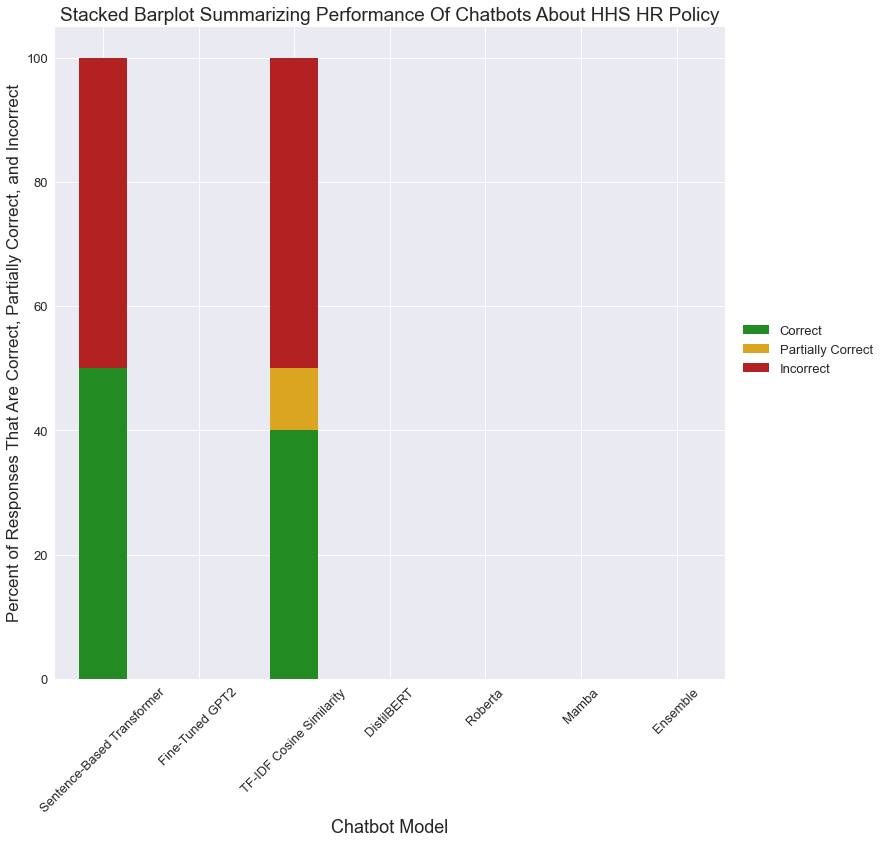

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

plt.style.use('seaborn')

ax = chatbot_performance_df.plot(kind = 'bar', stacked = True, figsize = (12, 12), fontsize = 13, color = ["forestgreen", "goldenrod", 'firebrick'])

ax.set_xticklabels(labels = ["Sentence-Based Transformer", 
                             "Fine-Tuned GPT2",
                             "TF-IDF Cosine Similarity",
                             "DistilBERT",
                             "Roberta",
                             "Mamba",
                             "Ensemble"], rotation = 45)
ax.set_xlabel("Chatbot Model", fontsize=18)
ax.set_ylabel("Percent of Responses That Are Correct, Partially Correct, and Incorrect", fontsize=17)
ax.set_title('Stacked Barplot Summarizing Performance Of Chatbots About HHS HR Policy', fontsize = 19)

plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0, fontsize = 13)

plt.show();
